# Atividade 2: Perceptron Simples
## Especialização em Ciência de Dados - Universidade Tecnologica Federal do Paraná
### Disciplina: Redes Neurais e Deep Learning
### Estudante: Patrick Motin Cruz
### Data: 27/10/2025

Nesta atividade, implementaremos e analisaremos o comportamento do Perceptron Simples em diferentes problemas de classificação binária. Vamos explorar:

1. Implementação do algoritmo base
2. Visualização dos dados e fronteiras de decisão
3. Análise do comportamento com diferentes portas lógicas
4. Compreensão das limitações do modelo

O objetivo é entender na prática como o Perceptron aprende e quais são suas capacidades e limitações.

# 1. Bibliotecas e Funções

Para implementar o Perceptron Simples, precisaremos:

1. **Bibliotecas**:
   - `numpy`: para operações matemáticas e manipulação de arrays
   - `matplotlib`: para visualização dos dados e fronteiras de decisão

2. **Funções principais**:
   - `perceptron_simples`: implementa o algoritmo de treinamento
   - `prever_perceptron`: realiza predições com o modelo treinado
   - `plot_dados`: visualiza a distribuição dos dados
   - `plot_decisao`: visualiza a fronteira de decisão aprendida

## 1.1 Implementação

Abaixo implementamos as funções necessárias seguindo o algoritmo apresentado em aula:

In [22]:
import numpy as np
import matplotlib.pyplot as plt

def plot_dados(X, D, titulo):
    plt.figure(figsize=(5,5))
    for i in range(len(X)):
        if D[i] == 0:
            plt.plot(X[i,0], X[i,1], 'ro')
        else:
            plt.plot(X[i,0], X[i,1], 'bo')
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('X1')
    plt.ylabel('X2')

def plot_decisao(X, D, W, titulo):
    plt.figure(figsize=(5,5))
    
    # Plot dos pontos
    for i in range(len(X)):
        if D[i] == 0:
            plt.plot(X[i,0], X[i,1], 'ro')
        else:
            plt.plot(X[i,0], X[i,1], 'bo')
    
    # Plot da fronteira de decisão
    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(W[0] + W[1]*x1)/W[2]
    plt.plot(x1, x2, 'g-')
    
    plt.grid(True)
    plt.title(titulo)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.axis([-0.5, 1.5, -0.5, 1.5])

def perceptron_simples(X, D, eta=0.1, max_epocas=1000):
    n_amostras = X.shape[0]
    n_features = X.shape[1]
    W = np.random.uniform(-0.5, 0.5, size=n_features + 1)
    epocas = 0
    erro = True
    while erro and epocas < max_epocas:
        erro = False
        for i in range(n_amostras):
            x = np.insert(X[i], 0, 1)
            V = np.dot(W, x)
            Y = 1 if V > 0 else 0
            if Y != D[i]:
                W = W + eta * (D[i] - Y) * x
                erro = True
        epocas += 1
    return W, epocas, not erro

def prever_perceptron(W, X):
    n_amostras = X.shape[0]
    Y = np.zeros(n_amostras, dtype=int)
    for i in range(n_amostras):
        x = np.insert(X[i], 0, 1)
        V = np.dot(W, x)
        Y[i] = 1 if V > 0 else 0
    return Y

# 2. Experimento com Porta Lógica OR

A porta lógica OR é um dos problemas mais simples para o Perceptron, pois é linearmente separável. 

**Tabela verdade do OR:**
| X1 | X2 | Saída |
|----|----| ------|
| 0  | 0  | 0     |
| 0  | 1  | 1     |
| 1  | 0  | 1     |
| 1  | 1  | 1     |

**Características:**
- Retorna 1 se qualquer uma das entradas for 1
- É um problema linearmente separável
- O Perceptron deve conseguir aprender facilmente esta função

Vamos analisar:
1. Como os dados se distribuem no espaço
2. Como o Perceptron aprende a separar as classes
3. Se a convergência é rápida e estável

Porta OR:
Pesos finais: [-0.04962768  0.11476614  0.06081062]
Épocas necessárias: 7
Convergiu? True
Previsões: [0 1 1 1]


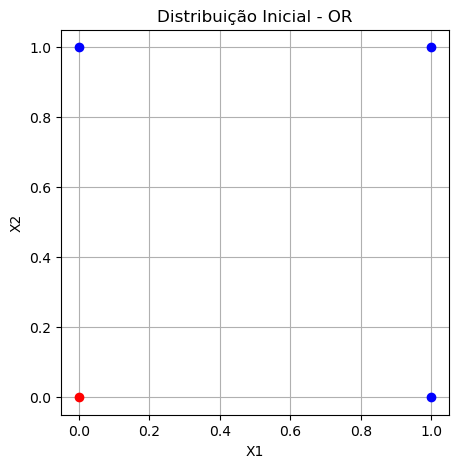

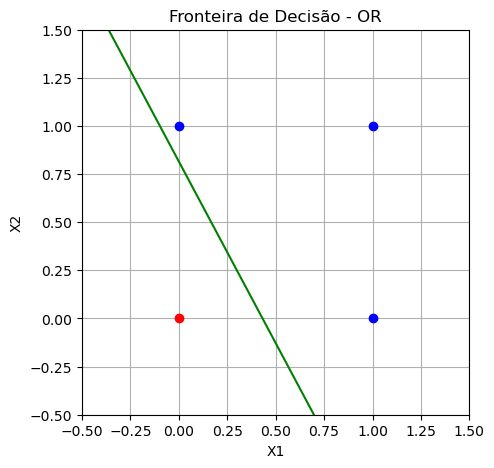

In [23]:
# Definindo os dados
X = np.array([[0,0],[0,1],[1,0],[1,1]])
D_OR = np.array([0,1,1,1])

# Visualização inicial
plot_dados(X, D_OR, 'Distribuição Inicial - OR')

# Treinamento
W, e, c = perceptron_simples(X, D_OR, eta=0.1, max_epocas=100)
print('Porta OR:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', prever_perceptron(W, X))

# Visualização da fronteira de decisão
plot_decisao(X, D_OR, W, 'Fronteira de Decisão - OR')

# 3. Experimento com Porta Lógica AND

A porta lógica AND é outro problema linearmente separável, mas com uma distribuição diferente do OR.

**Tabela verdade do AND:**
| X1 | X2 | Saída |
|----|----| ------|
| 0  | 0  | 0     |
| 0  | 1  | 0     |
| 1  | 0  | 0     |
| 1  | 1  | 1     |

**Características:**
- Retorna 1 apenas quando TODAS as entradas são 1
- Também é linearmente separável
- A fronteira de decisão tende a ser mais "inclinada" que no OR

Vamos observar:
1. Como a distribuição dos dados difere do OR
2. Como o Perceptron ajusta seus pesos para este novo padrão
3. Se há diferença no número de épocas necessárias para convergência

Porta AND:
Pesos finais: [-0.30771797  0.18346051  0.18024488]
Épocas necessárias: 9
Convergiu? True
Previsões: [0 0 0 1]


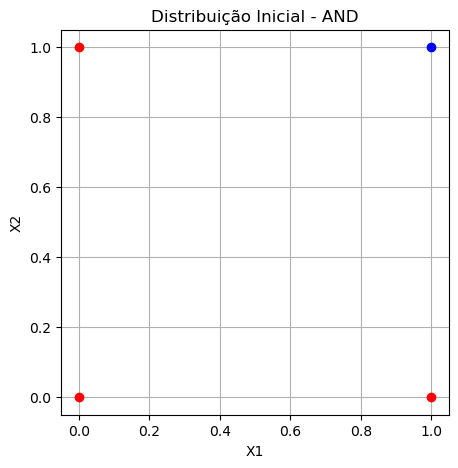

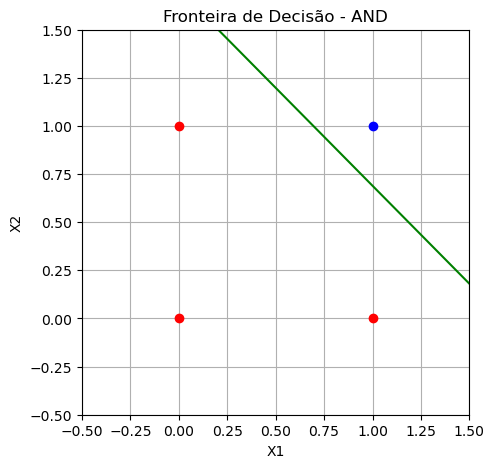

In [24]:
# Definindo os dados
D_AND = np.array([0,0,0,1])

# Visualização inicial
plot_dados(X, D_AND, 'Distribuição Inicial - AND')

# Treinamento
W, e, c = perceptron_simples(X, D_AND, eta=0.1, max_epocas=100)
print('Porta AND:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', prever_perceptron(W, X))

# Visualização da fronteira de decisão
plot_decisao(X, D_AND, W, 'Fronteira de Decisão - AND')

# 4. Experimento com Porta Lógica XOR

O XOR é o exemplo clássico de limitação do Perceptron Simples e é frequentemente usado para demonstrar a necessidade de redes neurais mais complexas.

**Tabela verdade do XOR:**
| X1 | X2 | Saída |
|----|----| ------|
| 0  | 0  | 0     |
| 0  | 1  | 1     |
| 1  | 0  | 1     |
| 1  | 1  | 0     |

**Características importantes:**
- Retorna 1 apenas quando as entradas são diferentes
- É um problema NÃO linearmente separável
- Impossível de ser resolvido por um único Perceptron
- Requer uma rede neural com mais camadas (MLP)

**Por que o XOR é especial?**
- Os pontos (0,0) e (1,1) pertencem a uma classe
- Os pontos (0,1) e (1,0) pertencem a outra classe
- Não existe uma única linha reta que consiga separar esses dois grupos

Vamos observar:
1. A distribuição peculiar dos dados
2. A tentativa frustrada do Perceptron em encontrar uma fronteira
3. O comportamento da convergência (que não acontecerá)
4. As previsões incorretas que serão geradas

Porta XOR:
Pesos finais: [ 0.0560413  -0.14414144 -0.02687526]
Épocas necessárias: 100
Convergiu? False
Previsões: [1 1 0 0]


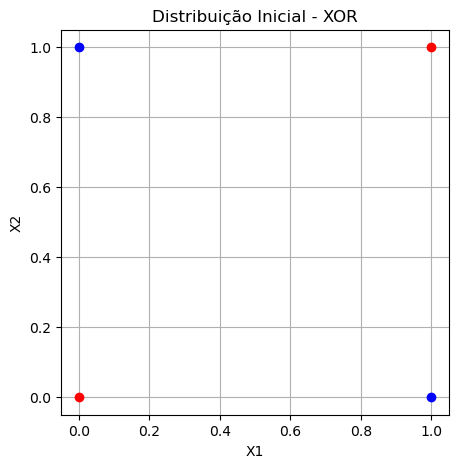

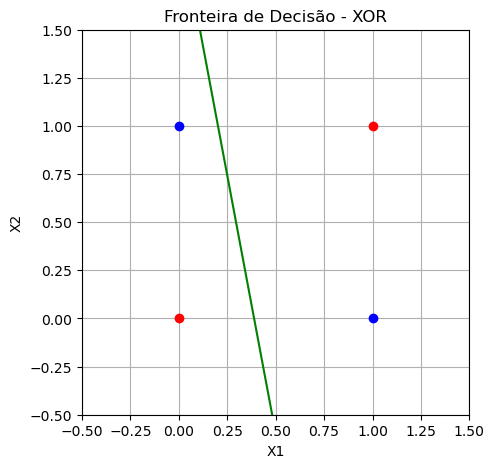

In [ ]:
# Definindo os dados
D_XOR = np.array([0,1,1,0])

# Visualização inicial
plot_dados(X, D_XOR, 'Distribuição Inicial - XOR')

# Treinamento
W, e, c = perceptron_simples(X, D_XOR, eta=0.1, max_epocas=100)
print('Porta XOR:')
print('Pesos finais:', W)
print('Épocas necessárias:', e)
print('Convergiu?', c)
print('Previsões:', prever_perceptron(W, X))

# Visualização da fronteira de decisão
plot_decisao(X, D_XOR, W, 'Fronteira de Decisão - XOR')

### Observação: O perceptron simples NÃO consegue aprender a função XOR, porque ela NÃO é linearmente separável)

# 5. Conclusões

Através dos experimentos realizados, podemos concluir:

1. **Problemas Linearmente Separáveis (OR e AND)**:
   - O Perceptron convergiu rapidamente
   - Encontrou fronteiras de decisão adequadas
   - As previsões foram 100% corretas
   - O número de épocas foi relativamente baixo

2. **Problema Não Linearmente Separável (XOR)**:
   - O Perceptron não conseguiu convergir
   - A fronteira de decisão encontrada não separa corretamente as classes
   - As previsões estão incorretas
   - Atingiu o número máximo de épocas sem sucesso

3. **Limitações do Perceptron Simples**:
   - Só funciona para problemas linearmente separáveis
   - Não é capaz de aprender funções mais complexas
   - Para problemas como XOR, é necessário usar redes neurais com mais camadas

4. **Importância Histórica**:
   - O problema do XOR foi um dos motivos do primeiro "inverno da IA"
   - Levou ao desenvolvimento de redes neurais multicamadas
   - Demonstra claramente a necessidade de arquiteturas mais complexas

Esta implementação nos ajuda a entender na prática os conceitos fundamentais de:
- Aprendizado supervisionado
- Separabilidade linear
- Limitações de modelos simples
- Necessidade de arquiteturas mais complexas